In [2]:
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd

#Birkenstock
i = 1
names_birk = []
material_birk = []
color_birk = []
prices_birk = []
while i <= 31:
    url_birkstock = f"https://www.birkenstock.com/it/modelli/?page={i}"
    data_birkstock= requests.get(url_birkstock)
    soup_birkstock = BeautifulSoup(data_birkstock.text, 'html.parser')
    div_soups = soup_birkstock.find_all('div', class_='tile-box')
       
    for div_soup in div_soups:
        name = div_soup.find('div', class_= 'product-modelname').text
        name = name.strip()
        names_birk.append(name)

    #for div_soup in div_soups:
        name = div_soup.find('div', class_= 'product-shortname').text
        name = name.strip()
        material_birk.append(name) 

    #for div_soup in div_soups:
        name = div_soup.find('div', class_= 'product-colorname').text
        name = name.strip()
        color_birk.append(name)

    #for div_soup in div_soups:
        name = div_soup.find('span', class_= 'price-standard').text
        name = name.strip()
        prices_birk.append(name)

    i += 1
    
prod_birk = pd.DataFrame({'Nome':names_birk, 'Materiale':material_birk,
                          'Colore':color_birk, 'Prezzo':prices_birk})

def separa_nome_sesso2(nome):
    if 'uomo' in nome or 'donna' in nome:
        nome, sesso = nome.rsplit(' ', 1)
    else:
        nome, sesso = nome, "U"
    return pd.Series([nome, sesso])

prod_birk[['Nome', 'Sesso']] = prod_birk['Nome'].apply(separa_nome_sesso2)

print("Birkenstock:\n", prod_birk)


Birkenstock:
                          Nome                  Materiale       Colore  \
0     Boston plantare morbido          Pelle scamosciata        Taupe   
1                     Arizona                 Birko-Flor   Dark Brown   
2    Arizona plantare morbido          Pelle scamosciata        Taupe   
3         Cotton Tennis Socks  Cotone/Poliammide/Elastan        Black   
4     Boston plantare morbido          Pelle scamosciata  Faded Khaki   
..                        ...                        ...          ...   
739     Cotton Sole Invisible  Cotone/Poliammide/Elastan        White   
740               Cotton Slub  Cotone/Poliammide/Elastan   Black/Gray   
741                    Boston               Pelle oliata       Habana   
742                     Gizeh                        EVA        Black   
743              Cotton Twist  Cotone/Poliammide/Elastan        Black   

       Prezzo  Sesso  
0    160,00 €      U  
1     85,00 €      U  
2    130,00 €      U  
3     14,90 €    

In [3]:
prod_birk.to_csv('birkenstock_products.csv', index=False)

In [4]:
#LGeox
i = 1

names_geox_m = []
color_geox_m = []
prices_geox_m = []
category_geox_m =[]

names_geox_f = []
color_geox_f = []
prices_geox_f = []
category_geox_f =[]

while i <= 15:
    url_geox_m = f"https://www.geox.com/it-IT/uomo/scarpe/?_gl={i}*14d2dm*_up*MQ..&gclid=Cj0KCQjw7ZO0BhDYARIsAFttkCg6ZD9_jSc2No_mhMGHjAPYyfRoV2aW4Z4pIKlHCCziZyx8ybiM1PMaAnopEALw_wcB&gclsrc=aw.ds"
    data_geox_m = requests.get(url_geox_m)
    soup_geox_m = BeautifulSoup(data_geox_m.text, 'html.parser')
    div_soups_m = soup_geox_m.find_all('div', class_="product-tile-bottom no-price-list")

    url_geox_f = f"https://www.geox.com/it-IT/donna/scarpe/?_gl={i}*14d2dm*_up*MQ..&gclid=Cj0KCQjw7ZO0BhDYARIsAFttkCg6ZD9_jSc2No_mhMGHjAPYyfRoV2aW4Z4pIKlHCCziZyx8ybiM1PMaAnopEALw_wcB&gclsrc=aw.ds"
    data_geox_f = requests.get(url_geox_f)
    soup_geox_f = BeautifulSoup(data_geox_f.text, 'html.parser')
    div_soups_f = soup_geox_f.find_all('div', class_="product-tile-bottom no-price-list") 

    #Uomo
    for div_soup in div_soups_m:
        name = div_soup.find('h3', class_= 'pdp-link').text
        name = name.strip()
        names_geox_m.append(name)

    for div_soup in div_soups_m:
        category = div_soup.find('div', class_= 'category').text
        category = category.strip()
        category_geox_m.append(category) 

    for div_soup in div_soups_m:
        color = div_soup.find('div', class_= 'colors').text
        color = color.strip()
        color_geox_m.append(color)

    for div_soup in div_soups_m:
        price = div_soup.find('span', class_= 'value').text
        price = price.strip()
        prices_geox_m.append(price)

    #Donna
    for div_soup in div_soups_f:
        name = div_soup.find('h3', class_= 'pdp-link').text
        name = name.strip()
        names_geox_f.append(name)

    for div_soup in div_soups_f:
        category = div_soup.find('div', class_= 'category').text
        category = category.strip()
        category_geox_f.append(category) 

    for div_soup in div_soups_f:
        color = div_soup.find('div', class_= 'colors').text
        color = color.strip()
        color_geox_f.append(color)

    for div_soup in div_soups_f:
        price = div_soup.find('span', class_= 'value').text
        price = price.strip()
        prices_geox_f.append(price)

    i += 1

names_geox = []
category_geox = []
color_geox = []
prices_geox = []


def merge(list1, list2):
    for x in list1:
        list2.append(x)

merge(names_geox_m, names_geox)
merge(category_geox_m, category_geox)
merge(color_geox_m, color_geox)
merge(prices_geox_m, prices_geox)
merge(names_geox_f, names_geox)
merge(category_geox_f, category_geox)
merge(color_geox_f, color_geox)
merge(prices_geox_f, prices_geox)  

prod_geox = pd.DataFrame({'Nome':names_geox, 'Categoria':category_geox,
                          'Colori':color_geox, 'Prezzo':prices_geox})

prod_geox[['Nome', 'Sesso']] = prod_geox['Nome'].str.rsplit(' ', n=1, expand=True)

print("Geox:\n", prod_geox)

Geox:
                    Nome                  Categoria    Colori   Prezzo  Sesso
0        SPHERICA ACTIF      Sneakers ammortizzate  6 colori  €119,90   UOMO
1                 ERICE                   Ciabatte  2 colori   €69,90   UOMO
2        SPHERICA EC4.1             Sneakers basse  2 colori  €139,90   UOMO
3                IACOPO            Scarpe in pelle  2 colori  €139,90   UOMO
4                 AVOLA      Mocassini scamosciati  2 colori  €109,90   UOMO
..                  ...                        ...       ...      ...    ...
715        NEBULA 2.0 X          Sneakers platform  2 colori  €139,90  DONNA
716  WALK PLEASURE 90.1      Decollette tacco alto  2 colori  €159,90  DONNA
717            ALLENIEE         Sneakers con zeppa  2 colori   €99,90  DONNA
718           XAND 2.1S           Sandali platform  2 colori  €109,90  DONNA
719            CHARYSSA  Slingback con tacco basso  3 colori  €119,90  DONNA

[720 rows x 5 columns]


In [5]:
prod_geox.to_csv('geox_products.csv', index=False)

In [6]:
#Teva
url_teva_m = "https://www.tevafootwear.it/uomo/Footwear/vedi-tutto"
data_teva_m = requests.get(url_teva_m)
soup_m = BeautifulSoup(data_teva_m.text, "html.parser")
article_soups_m = soup_m.find_all("article")

url_teva_f = "https://www.tevafootwear.it/donna/Footwear/vedi-tutto"
data_teva_f = requests.get(url_teva_f)
soup_f = BeautifulSoup(data_teva_f.text, "html.parser")
article_soups_f = soup_f.find_all("article")

prices_teva = []
for article_soup in article_soups_m:
    price = article_soup.find("span", class_="price").text
    prices_teva.append( price )

for article_soup in article_soups_f:
    price = article_soup.find("span", class_="price").text
    prices_teva.append( price )

names_teva = []
for article_soup in article_soups_m:
    name = article_soup.find("h2", class_="product-name").text
    names_teva.append(name)

for article_soup in article_soups_f:
    name = article_soup.find("h2", class_="product-name").text
    names_teva.append(name)

prod_teva = pd.DataFrame({'Nome':names_teva, 'Prezzo':prices_teva})

def separa_nome_sesso(nome):
    if nome[-1] == 'M' or nome[-1] == 'W':
        nome, sesso = nome.rsplit(' ', 1)
    else:
        nome, sesso = nome, "U"
    return pd.Series([nome, sesso])

# Applica la funzione a ogni riga del DataFrame
prod_teva[['Nome', 'Sesso']] = prod_teva['Nome'].apply(separa_nome_sesso)


print("\nTeva:\n", prod_teva)

print("DONE")



Teva:
                            Nome   Prezzo Sesso
0    Original Universal Sandalo   €65,00     M
1    Original Universal Sandalo   €65,00     M
2    Original Universal Sandalo   €65,00     M
3    Original Universal Sandalo   €65,00     M
4    Original Universal Sandalo   €65,00     M
..                          ...      ...   ...
333          U  ReEmber Terrain  €115,00     U
334         ReEmber Terrain Mid  €125,00     W
335         ReEmber Terrain Mid  €125,00     W
336         ReEmber Terrain Mid  €125,00     W
337           Geotrecca Low RP   €159,00     W

[338 rows x 3 columns]
DONE


In [7]:
prod_teva.to_csv('teva_products.csv', index=False)

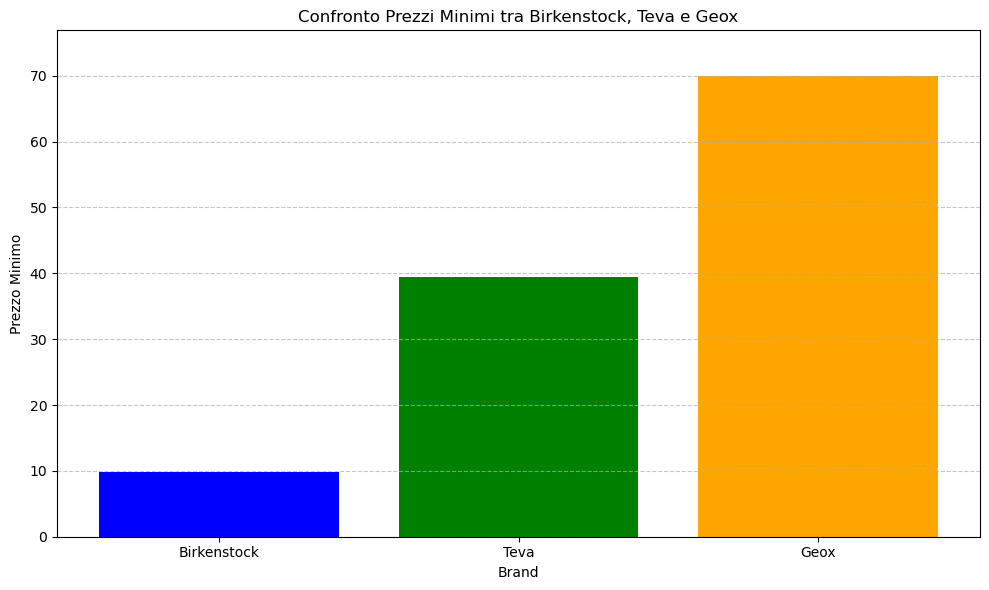

In [26]:
# Funzione per convertire il prezzo in formato numerico, gestendo i casi non numerici
def convert_price(price):
    try:
        # Rimuove caratteri non numerici e converti in float
        return float(''.join(filter(str.isdigit, str(price))))
    except ValueError:
        return None  # Se non è possibile convertire, restituisci None

# Importare i dataset separatamente
birkenstock = pd.read_csv('birkenstock_products.csv')
teva = pd.read_csv('teva_products.csv')
geox = pd.read_csv('geox_products.csv')

# Calcolare i prezzi minimi per ciascun brand
min_price_birkenstock = birkenstock['Prezzo'].apply(convert_price).dropna().min()/100
min_price_teva = teva['Prezzo'].apply(convert_price).dropna().min()/100
min_price_geox = geox['Prezzo'].apply(convert_price).dropna().min()/100

# Creare un DataFrame per i prezzi minimi
data = {
    'Brand': ['Birkenstock', 'Teva', 'Geox'],
    'Prezzo Minimo': [min_price_birkenstock, min_price_teva, min_price_geox]
}
df_min_prices = pd.DataFrame(data)

# Grafico a barre dei prezzi minimi
plt.figure(figsize=(10, 6))
plt.bar(df_min_prices['Brand'], df_min_prices['Prezzo Minimo'], color=['blue', 'green', 'orange'])
plt.title('Confronto Prezzi Minimi tra Birkenstock, Teva e Geox')
plt.xlabel('Brand')
plt.ylabel('Prezzo Minimo')
plt.ylim(0, max(df_min_prices['Prezzo Minimo']) * 1.1)  # Imposta il limite superiore dell'asse y leggermente oltre il massimo
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

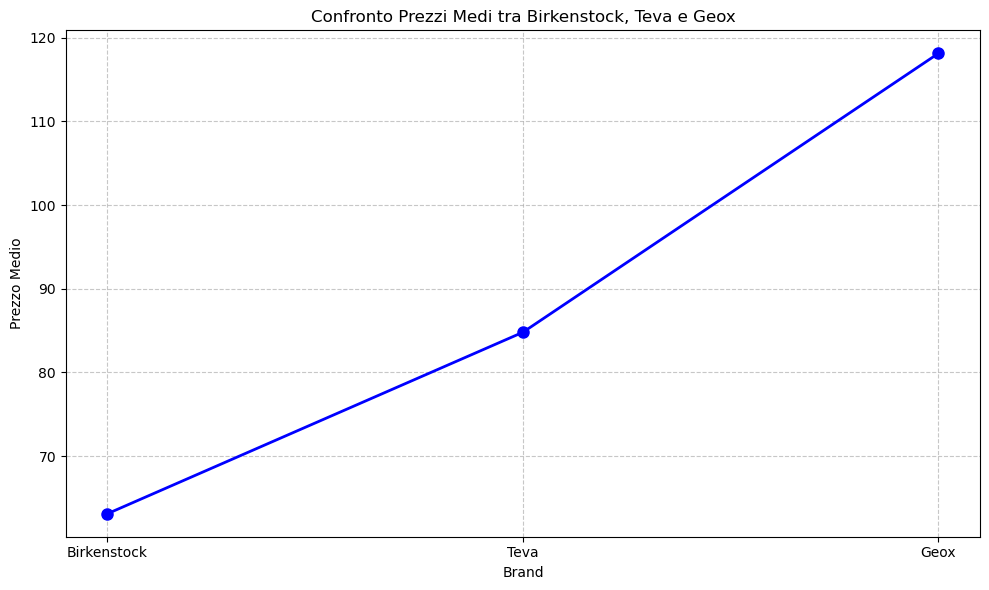

In [25]:
# Funzione per convertire il prezzo in formato numerico, gestendo i casi non numerici
def convert_price(price):
    try:
        # Rimuove caratteri non numerici e converti in float
        return float(''.join(filter(str.isdigit, str(price))))
    except ValueError:
        return None  # Se non è possibile convertire, restituisci None

# Importare i dataset separatamente
birkenstock = pd.read_csv('birkenstock_products.csv')
teva = pd.read_csv('teva_products.csv')
geox = pd.read_csv('geox_products.csv')

# Calcolare i prezzi medi per ciascun brand
mean_price_birkenstock = birkenstock['Prezzo'].apply(convert_price).dropna().mean() / 100
mean_price_teva = teva['Prezzo'].apply(convert_price).dropna().mean() / 100
mean_price_geox = geox['Prezzo'].apply(convert_price).dropna().mean() / 100
# Creare un DataFrame per i prezzi medi
data = {
    'Brand': ['Birkenstock', 'Teva', 'Geox'],
    'Prezzo Medio': [mean_price_birkenstock, mean_price_teva, mean_price_geox]
}
df_mean_prices = pd.DataFrame(data)

# Grafico a linea dei prezzi medi
plt.figure(figsize=(10, 6))
plt.plot(df_mean_prices['Brand'], df_mean_prices['Prezzo Medio'], marker='o', linestyle='-', color='b', linewidth=2, markersize=8)
plt.title('Confronto Prezzi Medi tra Birkenstock, Teva e Geox')
plt.xlabel('Brand')
plt.ylabel('Prezzo Medio')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

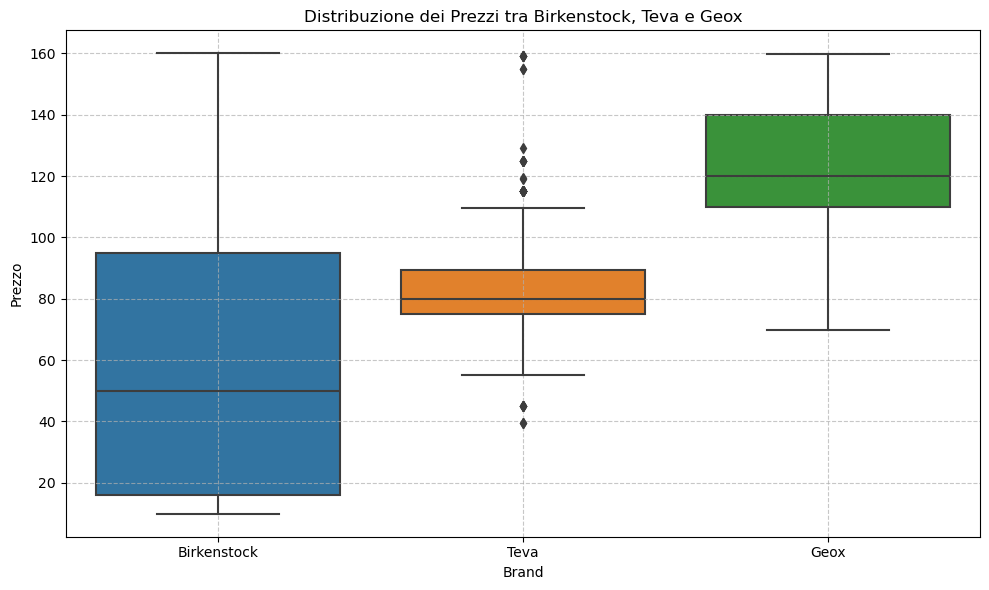

In [31]:
# Applica la funzione convert_price per convertire i prezzi in numeri
birkenstock['Prezzo Numerico'] = birkenstock['Prezzo'].apply(convert_price)/100
teva['Prezzo Numerico'] = teva['Prezzo'].apply(convert_price)/100
geox['Prezzo Numerico'] = geox['Prezzo'].apply(convert_price)/100

# Creazione del boxplot con seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Brand', y='Prezzo Numerico', data=all_prices.reset_index())
plt.title('Distribuzione dei Prezzi tra Birkenstock, Teva e Geox')
plt.xlabel('Brand')
plt.ylabel('Prezzo')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

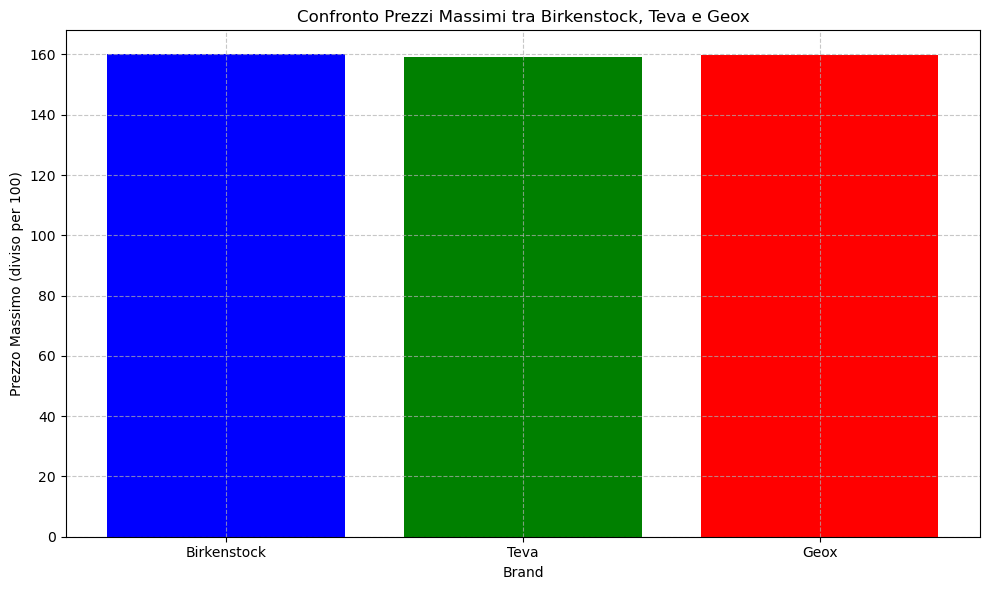

In [35]:
# Applica la funzione convert_price per convertire i prezzi in numeri
birkenstock['Prezzo Numerico'] = birkenstock['Prezzo'].apply(convert_price)
teva['Prezzo Numerico'] = teva['Prezzo'].apply(convert_price)
geox['Prezzo Numerico'] = geox['Prezzo'].apply(convert_price)

# Calcolare i prezzi massimi per ciascun brand, dividendo per 100
max_price_birkenstock = birkenstock['Prezzo Numerico'].max() / 100
max_price_teva = teva['Prezzo Numerico'].max() / 100
max_price_geox = geox['Prezzo Numerico'].max() / 100

# Creazione del grafico di comparazione dei prezzi massimi
brands = ['Birkenstock', 'Teva', 'Geox']
max_prices = [max_price_birkenstock, max_price_teva, max_price_geox]

plt.figure(figsize=(10, 6))
plt.bar(brands, max_prices, color=['blue', 'green', 'red'])
plt.title('Confronto Prezzi Massimi tra Birkenstock, Teva e Geox')
plt.xlabel('Brand')
plt.ylabel('Prezzo Massimo (diviso per 100)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

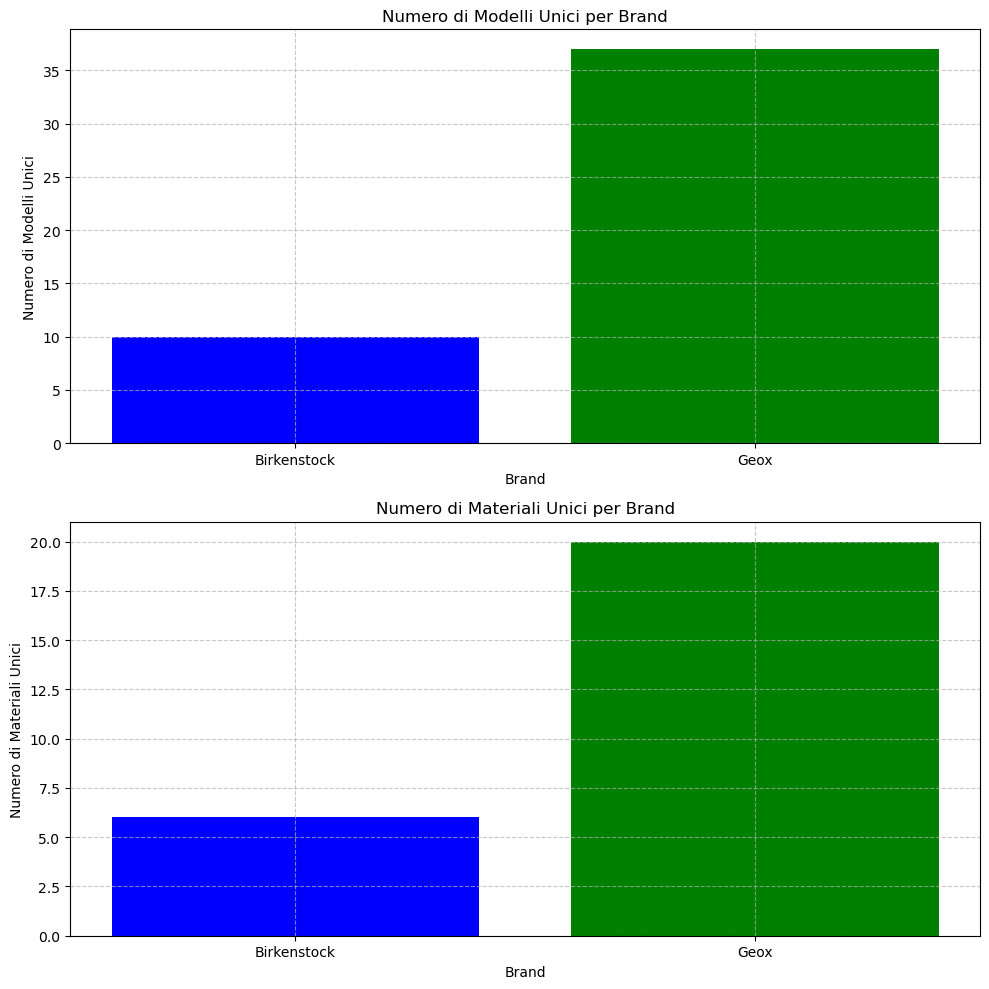

In [39]:
# Funzione per contare i valori unici, gestendo i casi non numerici
def count_unique_values(df, column):
    if column in df.columns:
        return df[column].nunique()
    else:
        return 0

# Conteggio dei modelli unici e dei materiali unici per Birkenstock e Geox
num_modelli_birkenstock = count_unique_values(birkenstock, 'Nome')
num_materiali_birkenstock = count_unique_values(birkenstock, 'Materiale')

num_modelli_geox = count_unique_values(geox, 'Nome')
num_materiali_geox = count_unique_values(geox, 'Categoria')

# Creazione del grafico a barre
brands = ['Birkenstock', 'Geox']
num_modelli = [num_modelli_birkenstock, num_modelli_geox]
num_materiali = [num_materiali_birkenstock, num_materiali_geox]

fig, ax = plt.subplots(2, figsize=(10, 10))

# Grafico per il numero di modelli unici
ax[0].bar(brands, num_modelli, color=['blue', 'green'])
ax[0].set_title('Numero di Modelli Unici per Brand')
ax[0].set_xlabel('Brand')
ax[0].set_ylabel('Numero di Modelli Unici')
ax[0].grid(True, linestyle='--', alpha=0.7)

# Grafico per il numero di materiali unici
ax[1].bar(brands, num_materiali, color=['blue', 'green'])
ax[1].set_title('Numero di Materiali Unici per Brand')
ax[1].set_xlabel('Brand')
ax[1].set_ylabel('Numero di Materiali Unici')
ax[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

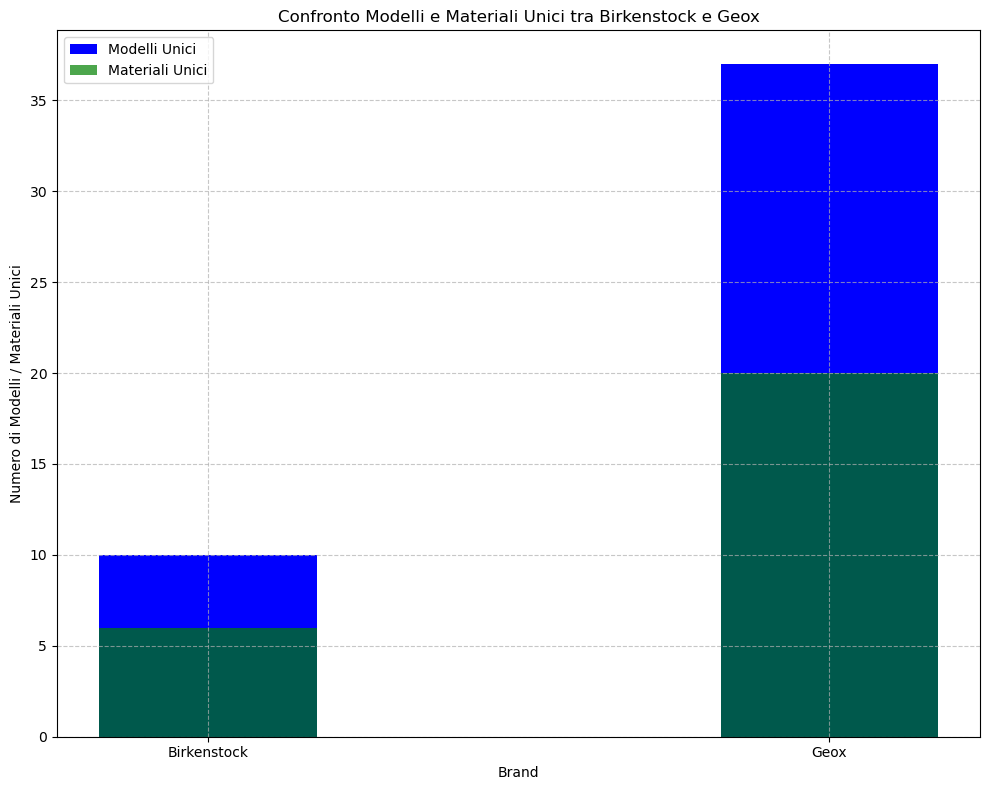

In [40]:
# Funzione per contare i valori unici, gestendo i casi non numerici
def count_unique_values(df, column):
    if column in df.columns:
        return df[column].nunique()
    else:
        return 0

# Conteggio dei modelli unici e dei materiali unici per Birkenstock e Geox
num_modelli_birkenstock = count_unique_values(birkenstock, 'Nome')
num_materiali_birkenstock = count_unique_values(birkenstock, 'Materiale')

num_modelli_geox = count_unique_values(geox, 'Nome')
num_materiali_geox = count_unique_values(geox, 'Categoria')

# Creazione del grafico a barre sovrapposte
brands = ['Birkenstock', 'Geox']
bar_width = 0.35  # larghezza delle barre

fig, ax = plt.subplots(figsize=(10, 8))

# Barre per il numero di modelli unici
ax.bar(brands, [num_modelli_birkenstock, num_modelli_geox], bar_width, label='Modelli Unici', color='blue')

# Barre per il numero di materiali unici
ax.bar(brands, [num_materiali_birkenstock, num_materiali_geox], bar_width, label='Materiali Unici', color='green', alpha=0.7)

# Personalizzazione del grafico
ax.set_title('Confronto Modelli e Materiali Unici tra Birkenstock e Geox')
ax.set_xlabel('Brand')
ax.set_ylabel('Numero di Modelli / Materiali Unici')
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend()

plt.tight_layout()
plt.show()

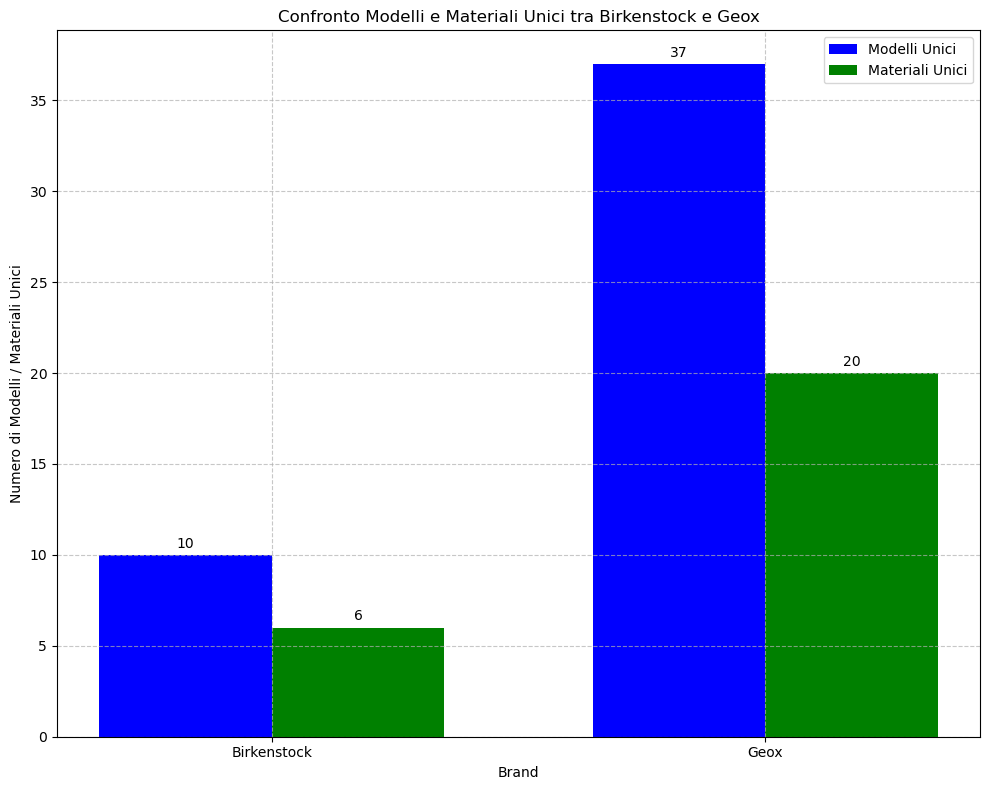

In [42]:
import numpy as np

# Funzione per contare i valori unici, gestendo i casi non numerici
def count_unique_values(df, column):
    if column in df.columns:
        return df[column].nunique()
    else:
        return 0

# Conteggio dei modelli unici e dei materiali unici per Birkenstock e Geox
num_modelli_birkenstock = count_unique_values(birkenstock, 'Nome')
num_materiali_birkenstock = count_unique_values(birkenstock, 'Materiale')

num_modelli_geox = count_unique_values(geox, 'Nome')
num_materiali_geox = count_unique_values(geox, 'Categoria')

# Preparazione dei dati per il grafico
brands = ['Birkenstock', 'Geox']
modelli = [num_modelli_birkenstock, num_modelli_geox]
materiali = [num_materiali_birkenstock, num_materiali_geox]

bar_width = 0.35  # Larghezza delle barre
index = np.arange(len(brands))  # Indici per posizionare le barre

# Creazione del grafico con colonne separate
fig, ax = plt.subplots(figsize=(10, 8))

# Barre per i modelli unici
rects1 = ax.bar(index, modelli, bar_width, label='Modelli Unici', color='blue')

# Barre per i materiali unici
rects2 = ax.bar(index + bar_width, materiali, bar_width, label='Materiali Unici', color='green')

# Personalizzazione del grafico
ax.set_title('Confronto Modelli e Materiali Unici tra Birkenstock e Geox')
ax.set_xlabel('Brand')
ax.set_ylabel('Numero di Modelli / Materiali Unici')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(brands)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

# Funzione per aggiungere le etichette sopra le barre
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Spaziamento verticale
                    textcoords="offset points",
                    ha='center', va='bottom')

# Applica le etichette
autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()
